In [1]:
import os, glob, time, h5py, warnings, sys
import os.path
import multiprocessing as mp
import matplotlib.pyplot as plt   # plots
import numpy as np
import scipy.sparse as sp
from scipy.optimize import curve_fit

from liblibra_core import *
import util.libutil as comn

import libra_py
from libra_py import units, data_conv, dynamics_plotting
import libra_py.dynamics.tsh.compute as tsh_dynamics
import libra_py.dynamics.tsh.plot as tsh_plot
#import libra_py.data_savers as data_savers
import libra_py.workflows.nbra.decoherence_times as decoherence_times
import libra_py.data_visualize
import libra_py.dynamics.tsh.plot as tsh_dynamics_plot


#from matplotlib.mlab import griddata
#%matplotlib inline 
warnings.filterwarnings('ignore')


<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for std::vector<std::vector<float, std::allocator<float> >, std::allocator<std::vector<float, std::allocator<float> > > > already registered; second conversion method ignored.
<frozen importlib._bootstrap>:228: RuntimeWar

## 1. Plotting the populations

EXACT-model0
EXACT-model1
EXACT-model2
EXACT-model3
EXACT-model4
EXACT-model5
EXACT-model6


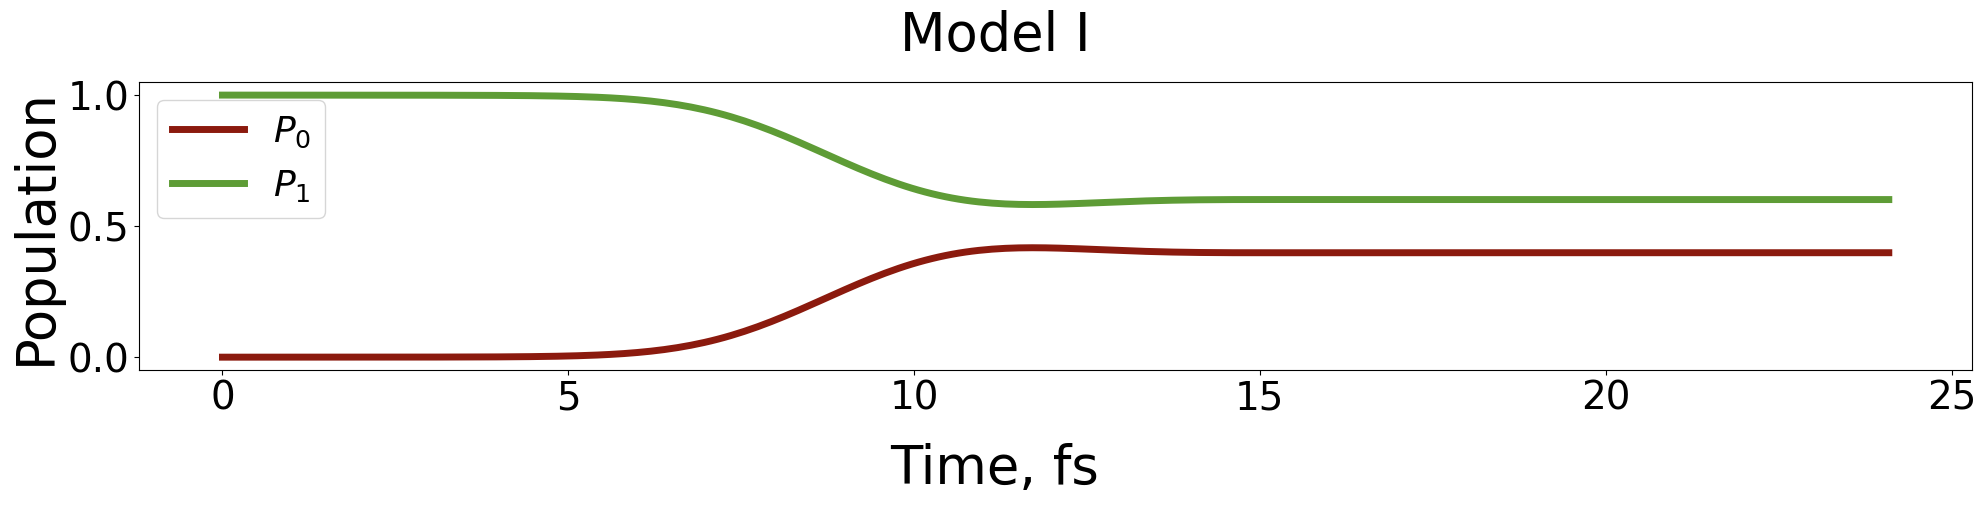

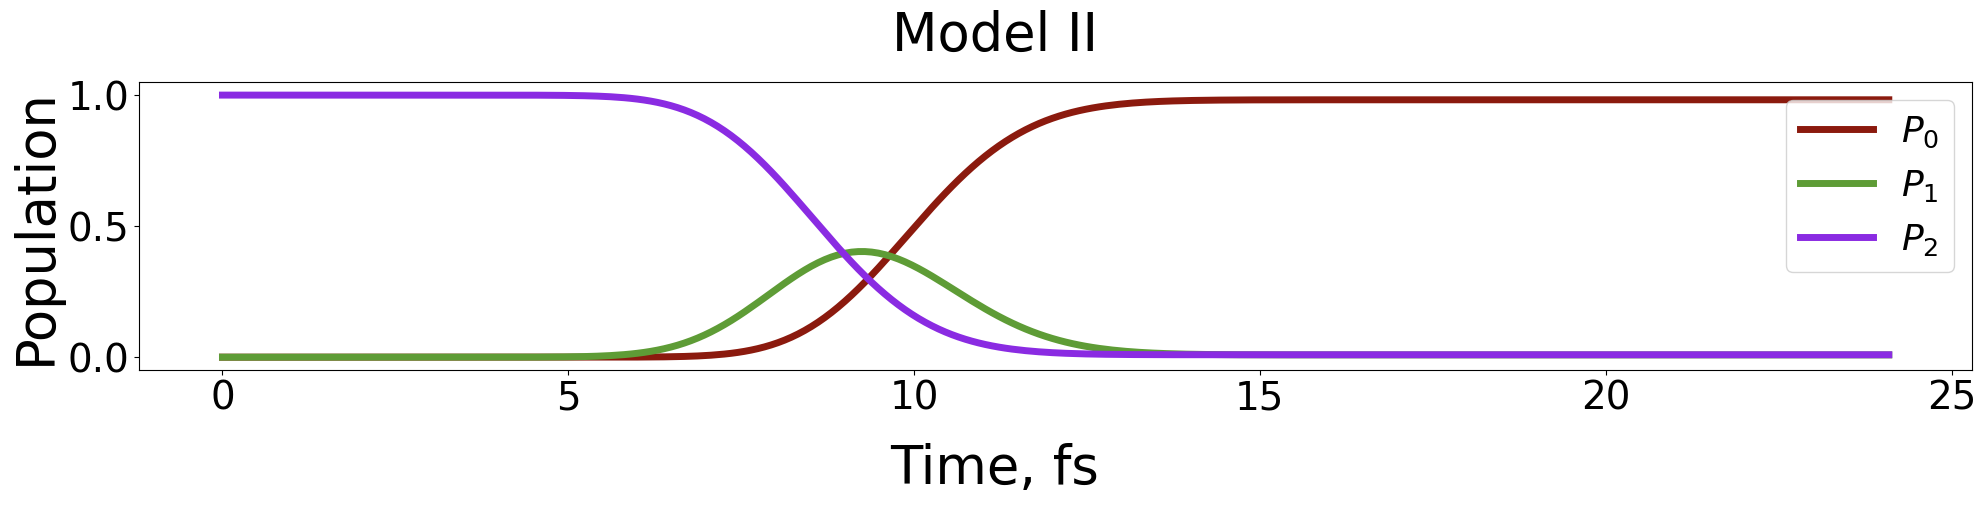

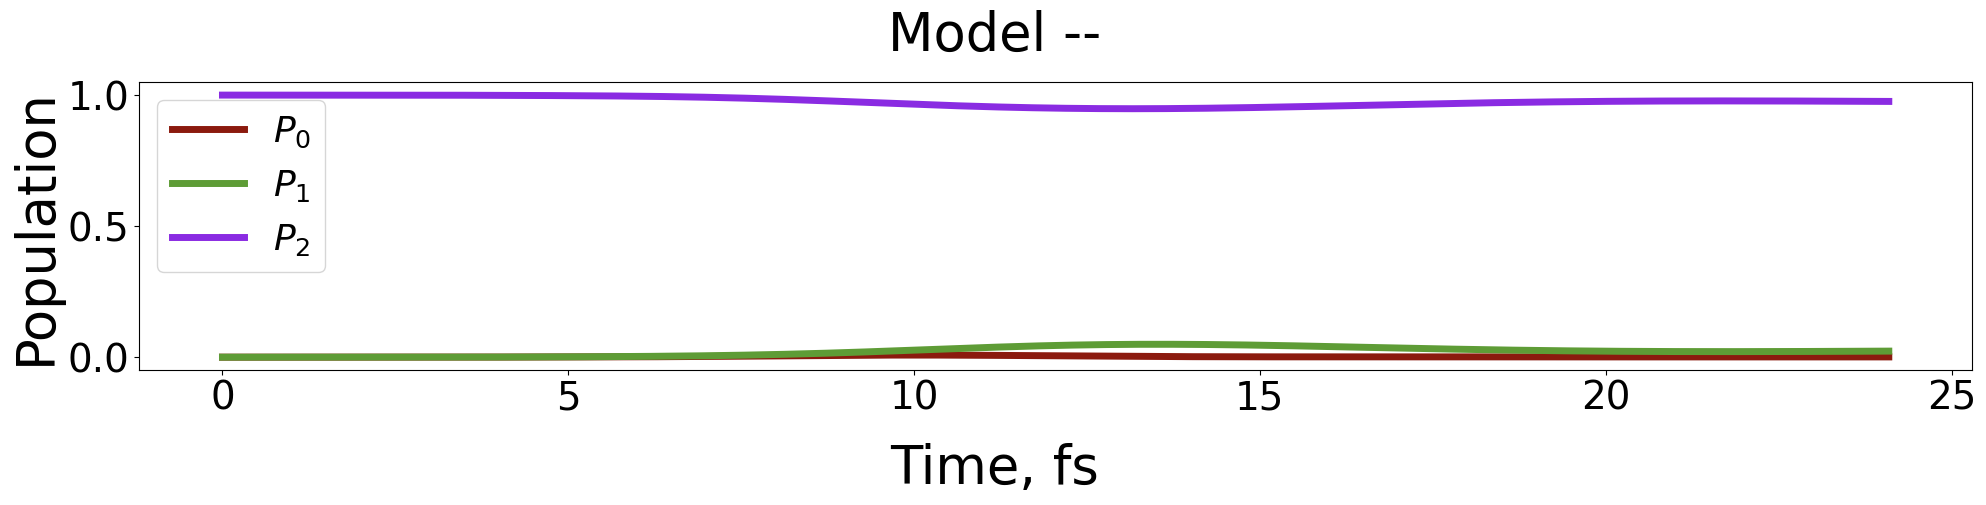

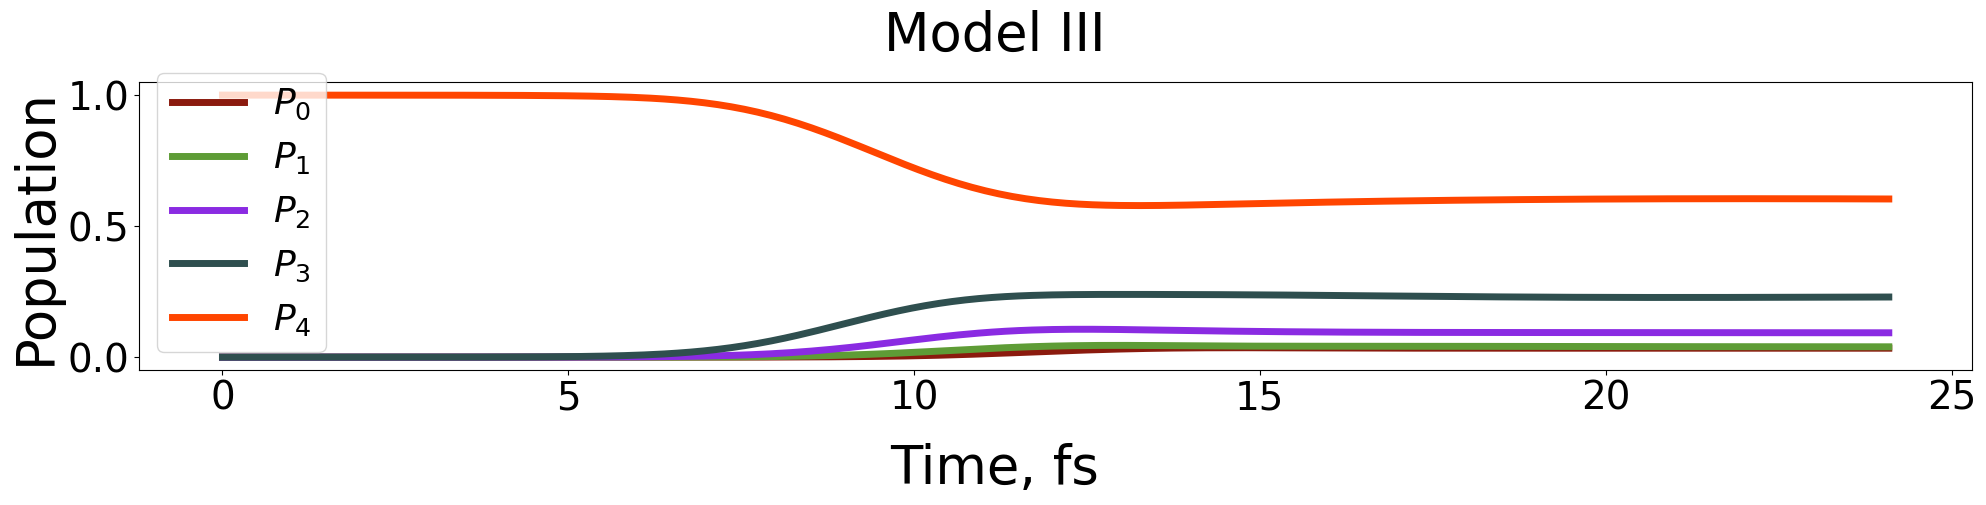

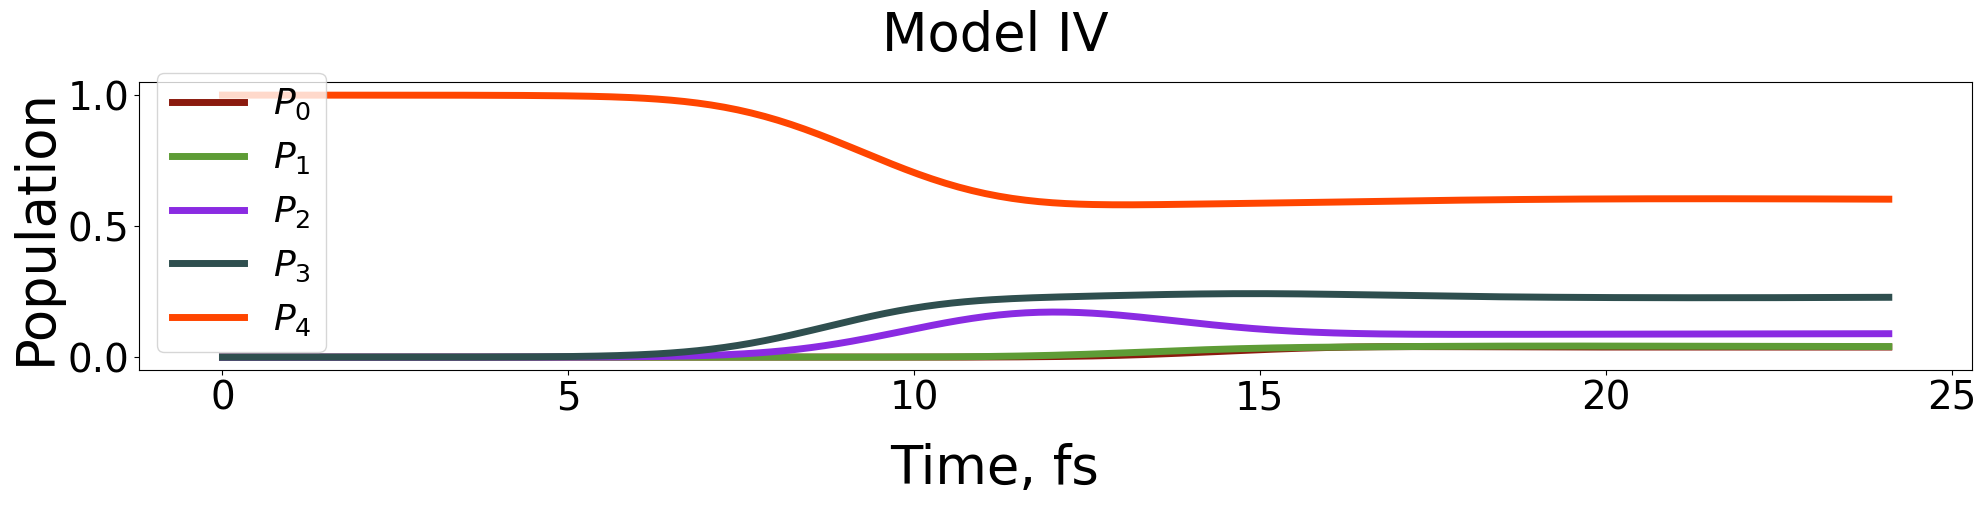

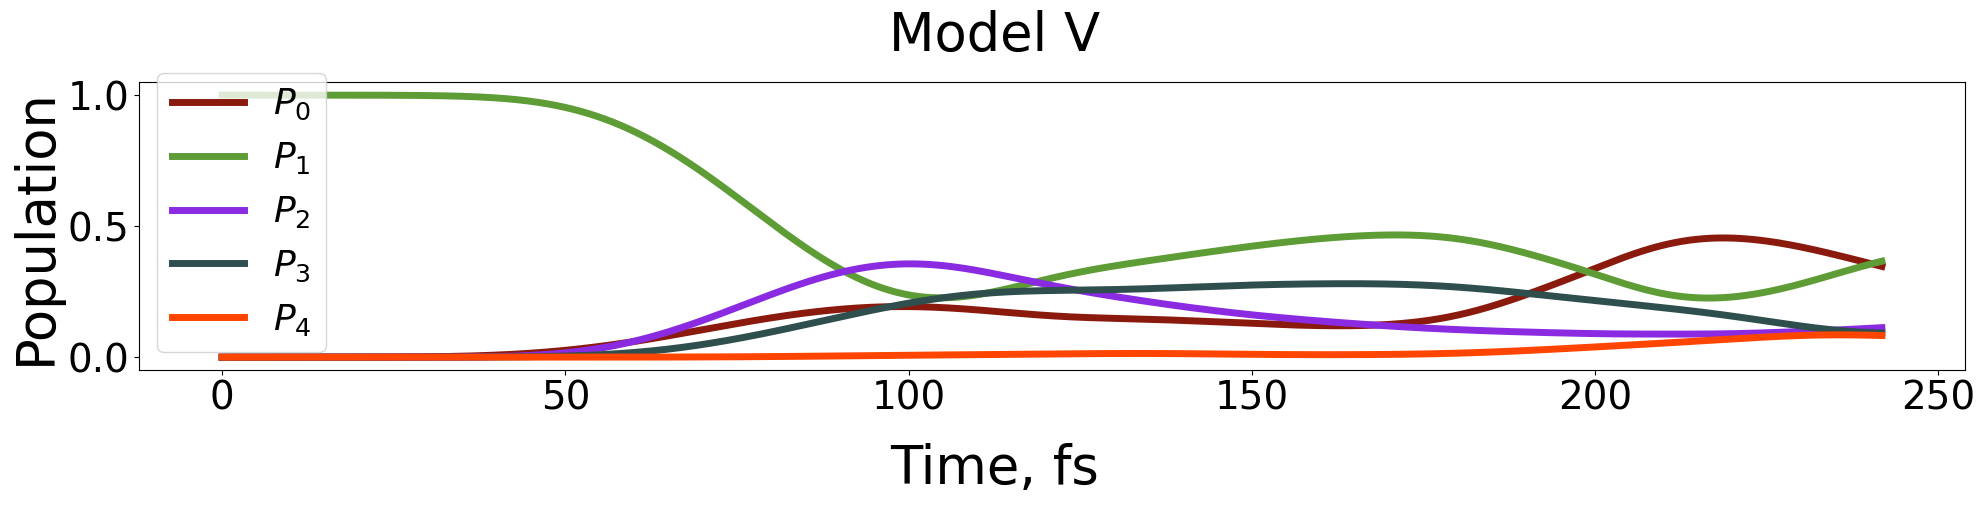

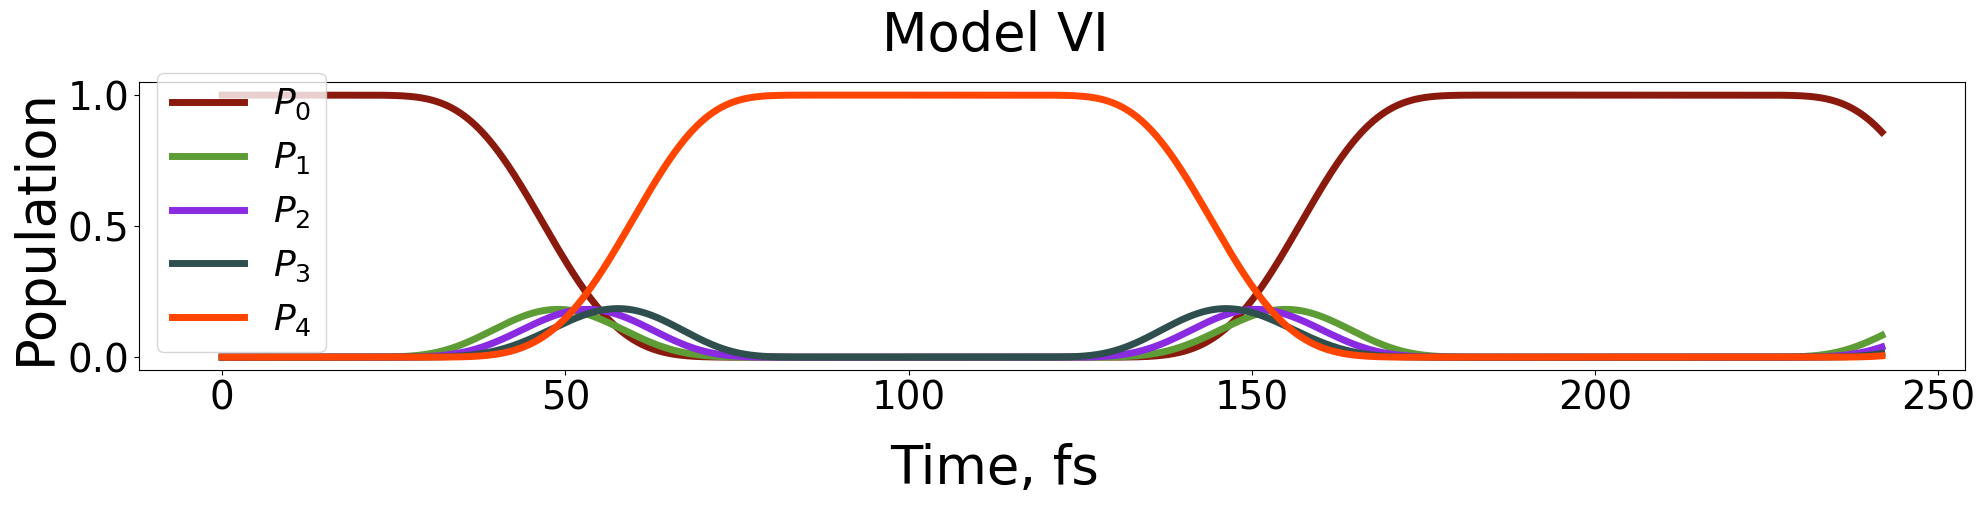

In [2]:
plt.rc('axes', titlesize=38)      # fontsize of the axes title
plt.rc('axes', labelsize=38)      # fontsize of the x and y labels
plt.rc('legend', fontsize=26)     # legend fontsize
plt.rc('xtick', labelsize=28)     # fontsize of the tick labels
plt.rc('ytick', labelsize=28)     # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)


font = {'family': 'serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 36,
        }

#======== Initial conditions and models ==============


models = [0, 1, 2, 3, 4, 5, 6]
models_map = { "0":"I", "1":"II", "2":"--", "3":"III", "4":"IV", "5":"V", "6":"VI"}

label_map = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)", "(g)", "(h)"]

for c, model_indx in enumerate(models):
        
    fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharey="row", sharex="col")
    Nsteps = 250
    if model_indx in [5,6]:
        Nsteps = 2500
    
    #=================== Exact data =========================
    prf = F"EXACT-model{model_indx}"        
    print(F"{prf}")
         
    pop_adi, t = None, None
    with h5py.File(F"{prf}/data.hdf", 'r') as F:
        pop_adi = np.array(F["pop_adi/data"][0:Nsteps, :, 0])                
        t = np.array(F['time/data'][0:Nsteps]) * units.au2fs                   
            
    nstates = pop_adi.shape[1]

    for i in range(nstates):
        clrs_index = libra_py.data_visualize.clrs_index[i % 10 ]        
        ax.plot(t, pop_adi[:, i], color=libra_py.data_visualize.colors[ clrs_index ], label=F"$P_{i}$", lw=5)                    
                                 
    ax.set_ylabel("Population")        
    fig.suptitle(F'Model { models_map[ str(model_indx)] }', size=38) 
    fig.supxlabel("Time, fs", size=38)
    
    plt.legend()
    plt.tight_layout()    
    plt.savefig(F'EXACT-model{model_indx}.png')
    
    